# MNIST digit classification with and without hidden layers


In this notebook you will use the MNIST dataset for a classification task. You will compare the performance of a fully connected neural network with and without hidden layers.


**Dataset:** You work with the MNIST dataset. We have 60'000 28x28 pixel greyscale images of handwritten digits and want to classify them into the right label (0-9).

**Content:**
* load the original MNIST data 
* visualize samples of the data
* flatten the data
* use keras to train a fcNN with and without hidden layers and compare the perfomance on new unseen test data

#### Imports

In the next two cells, we load all the required libraries and functions. We download the Mnist data, normalize the pixelvalues to be between 0 and 1, and seperate it into a training and validation set.

In [1]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers






#### Loading and preparing the MNIST data

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# separate x_train in X_train and X_val, same for y_train
X_train=x_train[0:50000] / 255 #divide by 255 so that they are in range 0 to 1
Y_train=to_categorical(y_train[0:50000],10) # one-hot encoding

X_val=x_train[50000:60000] / 255
Y_val=to_categorical(y_train[50000:60000],10)

X_test=x_test / 255
Y_test=to_categorical(y_test,10)

del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


Let's visualize the first 4 mnist images. It is very easy to recognise the true label of the digits.

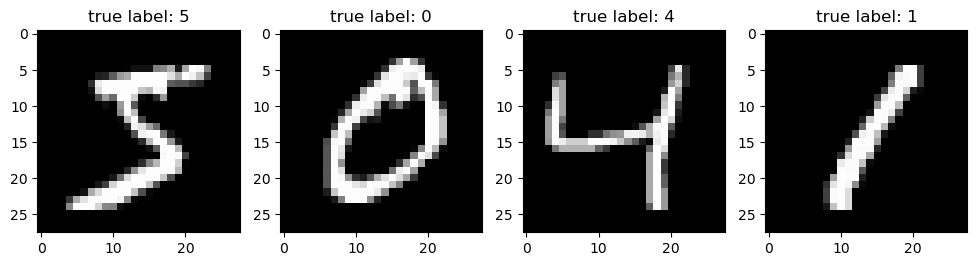

In [3]:
# visualize the 4 first mnist images 
plt.figure(figsize=(12,12))
for i in range(0,4):
    plt.subplot(1,4,(i+1))
    plt.imshow((X_train[i,:,:,0]),cmap="gray")
    plt.title('true label: '+str(np.argmax(Y_train,axis=1)[i]))
    #plt.axis('off')

## fcNN as classification model for MNIST data
Now we want to train a fcNN to classify the MNIST data. 
We use two network architectures:
* fcnn with no hidden layers
* fcnn with two hidden layers (100 and 50)


Because we will use fcNN we need to flatten our inuput into a 1d vector. We do this in the next cell with reshape.

In [4]:
# prepare data for fcNN - we need a vector as input

# first do it for original data
X_train_flat = X_train.reshape([X_train.shape[0], 784])
X_val_flat = X_val.reshape([X_val.shape[0], 784])
X_test_flat = X_test.reshape([X_test.shape[0], 784])

### Train the first fcNN on the data

In [5]:
# check the shape
X_train_flat.shape,Y_train.shape,X_val_flat.shape,Y_val.shape

((50000, 784), (50000, 10), (10000, 784), (10000, 10))

Here we define the nework. In the output we predict the probability for the 10 digits with the softmax activation function.

In [6]:
# define fcNN with 2 hidden layers
model = Sequential()

model.add(Dense(10, batch_input_shape=(None, 784), activation="softmax"))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# summarize model along with number of model weights
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
# train the model
history=model.fit(X_train_flat, Y_train, 
                  batch_size=128, 
                  epochs=10,
                  verbose=2, 
                  validation_data=(X_val_flat, Y_val)
                 )

Epoch 1/10
391/391 - 1s - loss: 0.7326 - accuracy: 0.8219 - val_loss: 0.3917 - val_accuracy: 0.9017
Epoch 2/10
391/391 - 1s - loss: 0.3856 - accuracy: 0.8979 - val_loss: 0.3227 - val_accuracy: 0.9134
Epoch 3/10
391/391 - 1s - loss: 0.3363 - accuracy: 0.9074 - val_loss: 0.2985 - val_accuracy: 0.9179
Epoch 4/10
391/391 - 1s - loss: 0.3131 - accuracy: 0.9137 - val_loss: 0.2836 - val_accuracy: 0.9218
Epoch 5/10
391/391 - 0s - loss: 0.2992 - accuracy: 0.9168 - val_loss: 0.2760 - val_accuracy: 0.9250
Epoch 6/10
391/391 - 1s - loss: 0.2900 - accuracy: 0.9195 - val_loss: 0.2691 - val_accuracy: 0.9266
Epoch 7/10
391/391 - 0s - loss: 0.2830 - accuracy: 0.9208 - val_loss: 0.2664 - val_accuracy: 0.9287
Epoch 8/10
391/391 - 0s - loss: 0.2780 - accuracy: 0.9224 - val_loss: 0.2647 - val_accuracy: 0.9292
Epoch 9/10
391/391 - 0s - loss: 0.2732 - accuracy: 0.9238 - val_loss: 0.2610 - val_accuracy: 0.9283
Epoch 10/10
391/391 - 0s - loss: 0.2696 - accuracy: 0.9245 - val_loss: 0.2598 - val_accuracy: 0.9292

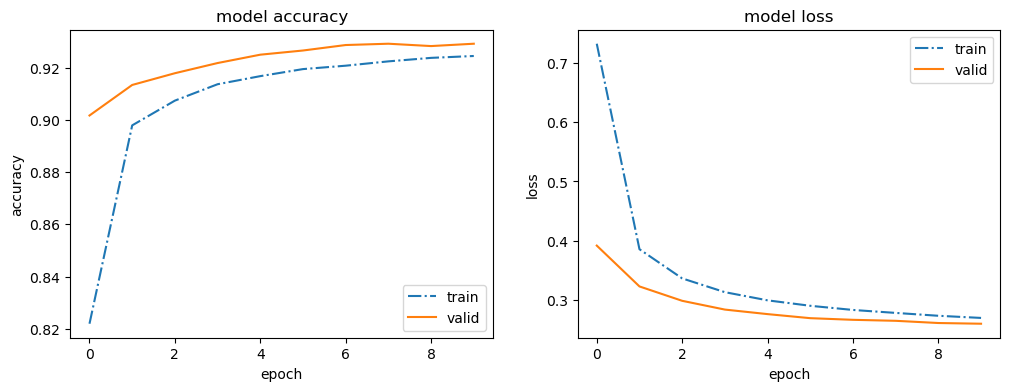

In [9]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

#### Prediction on the test set 

Now, let's use the fcNN that was trained to predict new unseen data (our testdata).
We determine the confusion matrix and the accuracy on the testdata to evaluate the classification performance.


In [10]:
pred=model.predict(X_test_flat)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc_fc = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc = " , acc_fc)

[[ 962    0    1    1    0    4    7    3    2    0]
 [   0 1118    3    2    0    1    4    2    5    0]
 [   6   11  919   21    7    2   13   10   37    6]
 [   2    1   16  931    0   19    2   13   20    6]
 [   2    2    4    2  911    0    9    3    9   40]
 [   9    4    4   38    7  768   16    7   31    8]
 [  10    3    8    1    8    9  916    2    1    0]
 [   1    8   23    8    6    0    0  956    1   25]
 [   6    9    7   23    9   21    9   14  870    6]
 [  10    7    2   12   24    7    0   31    4  912]]
Acc =  0.9263


### Train the second fcNN on the data

Now, we define the nework with two hidden layers (100, 50). We use the sigmoid activation function on the hidden layers. In the output we predict the probability for the 10 digits with the softmax activation function.

In [11]:
# define fcNN with 2 hidden layers
model = Sequential()

model.add(Dense(100, batch_input_shape=(None, 784)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# summarize model along with number of model weights
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
__________________________________________________

In [13]:
# train the model
history=model.fit(X_train_flat, Y_train, 
                  batch_size=128, 
                  epochs=10,
                  verbose=2, 
                  validation_data=(X_val_flat, Y_val)
                 )

Epoch 1/10
391/391 - 1s - loss: 0.9580 - accuracy: 0.7834 - val_loss: 0.3982 - val_accuracy: 0.9030
Epoch 2/10
391/391 - 1s - loss: 0.3362 - accuracy: 0.9105 - val_loss: 0.2570 - val_accuracy: 0.9306
Epoch 3/10
391/391 - 1s - loss: 0.2454 - accuracy: 0.9306 - val_loss: 0.2054 - val_accuracy: 0.9430
Epoch 4/10
391/391 - 1s - loss: 0.1982 - accuracy: 0.9432 - val_loss: 0.1763 - val_accuracy: 0.9499
Epoch 5/10
391/391 - 1s - loss: 0.1662 - accuracy: 0.9515 - val_loss: 0.1531 - val_accuracy: 0.9564
Epoch 6/10
391/391 - 1s - loss: 0.1418 - accuracy: 0.9593 - val_loss: 0.1388 - val_accuracy: 0.9606
Epoch 7/10
391/391 - 1s - loss: 0.1224 - accuracy: 0.9647 - val_loss: 0.1240 - val_accuracy: 0.9640
Epoch 8/10
391/391 - 1s - loss: 0.1066 - accuracy: 0.9699 - val_loss: 0.1145 - val_accuracy: 0.9660
Epoch 9/10
391/391 - 1s - loss: 0.0935 - accuracy: 0.9739 - val_loss: 0.1072 - val_accuracy: 0.9693
Epoch 10/10
391/391 - 1s - loss: 0.0825 - accuracy: 0.9774 - val_loss: 0.1011 - val_accuracy: 0.9700

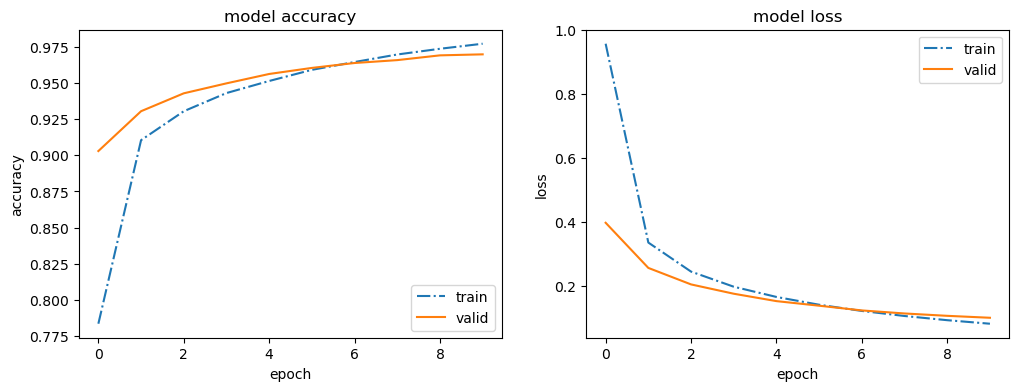

In [14]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [15]:
pred=model.predict(X_test_flat)
print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1)))
acc_fc = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Acc = " , acc_fc)

[[ 965    0    0    1    0    2    7    2    1    2]
 [   0 1117    4    2    0    1    3    2    6    0]
 [   6    1  998    2    2    0    4    8   11    0]
 [   0    0    6  985    0    3    0    7    7    2]
 [   0    0    4    0  949    0    6    3    3   17]
 [   3    1    1    8    2  850    8    2   12    5]
 [   5    3    1    1    4    6  931    0    7    0]
 [   2    3   11    7    1    0    0  994    2    8]
 [   4    1    2   11    4    4    1    4  942    1]
 [   3    5    1    8   14    5    0    9    8  956]]
Acc =  0.9687


## Exercise  
What do you observe when you compare the network with the hidden layers to the one without?  
  
Try to improve the fcNN by adding more hidden layers and/or changing the activation function from "sigmoid" to "relu". What do you observe? 
